<ipython-input-2-269401bc68b9>:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coefficients = np.zeros(N, dtype=np.complex)
<ipython-input-2-269401bc68b9>:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  reconstructed = np.zeros_like(t, dtype=np.complex)


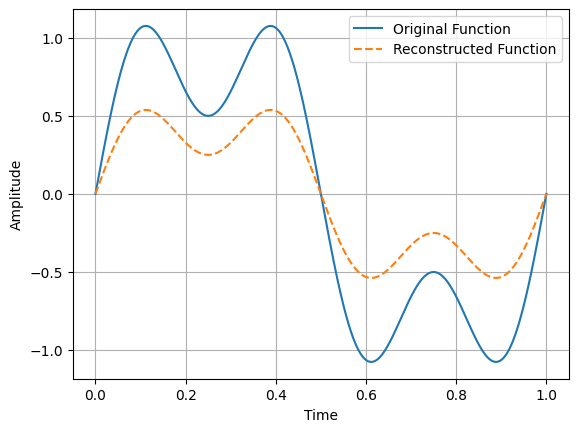

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_fourier_series_coefficients(f, T, N):

    coefficients = np.zeros(N, dtype=np.complex)

    t = np.linspace(0, T, num=1000)
    dt = t[1] - t[0]

    for n in range(N):
        integrand = f(t) * np.exp(-1j * 2 * np.pi * n * t / T)
        coefficients[n] = (1 / T) * np.sum(integrand) * dt

    return coefficients

def reconstruct_from_fourier_series(coefficients, T, t):

    N = len(coefficients)
    reconstructed = np.zeros_like(t, dtype=np.complex)

    for n in range(N):
        reconstructed += coefficients[n] * np.exp(1j * 2 * np.pi * n * t / T)

    return reconstructed

# Sample function
def f(t):
    return np.sin(2 * np.pi * t) + 0.5 * np.sin(6 * np.pi * t)

# Period and number of coefficients
T = 1.0
N = 10

# Calculate Fourier series coefficients
coefficients = calculate_fourier_series_coefficients(f, T, N)

# Time points for plotting
t = np.linspace(0, T, num=1000)

# Original function
original = f(t)

# Reconstructed function
reconstructed = reconstruct_from_fourier_series(coefficients, T, t)

# Plotting
plt.plot(t, original, label='Original Function')
plt.plot(t, reconstructed.real, '--', label='Reconstructed Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-3-91dc7a722447>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, energy_spectrum, use_line_collection=True)


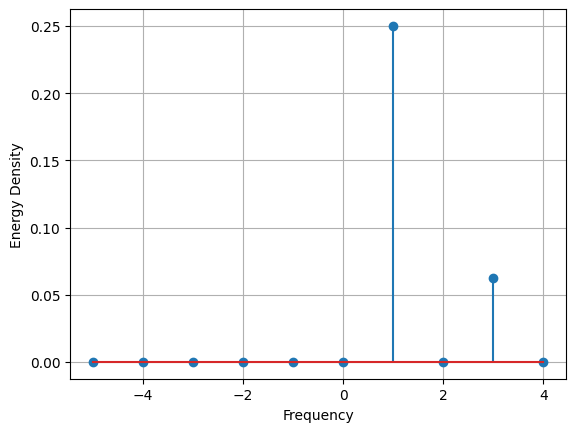

In [3]:
def calculate_energy_density_spectrum(coefficients):

    spectrum = np.abs(coefficients) ** 2
    return spectrum

# Calculate the energy density spectrum
energy_spectrum = calculate_energy_density_spectrum(coefficients)

# Frequency values for plotting
frequencies = np.fft.fftfreq(N, d=T/N)

# Plotting the energy density spectrum
plt.stem(frequencies, energy_spectrum, use_line_collection=True)
plt.xlabel('Frequency')
plt.ylabel('Energy Density')
plt.grid(True)
plt.show()